# Computer Problem Set 1 : Th Cox-Ross-Rubinstein model

## Imane Farhat

In [2]:
import numpy as np
from scipy.special import binom
import scipy.stats as sps
import matplotlib.pyplot as plt

Let's consider the binomial model defined by $S_0$>0, T>0, and :
$u=u_n=exp(bh_n + \sigma \sqrt{h_n})  ,  d=d_n=exp(bh_n - \sigma \sqrt{h_n}) $  où  $ h_n:=\frac{T}{n} , \sigma>0, b\geq 0$
We denote by $S^n_j$ the vetor of possible prices at time j defined by :
$ S^n_j (i):= S_0 u^{j-i} d^i , i=0,...,j $

### Question 1

In [3]:
def un(T, n, b, sigma):
    hn=T/n
    return np.exp(b*hn + sigma*np.sqrt(hn))
def dn(T, n, b, sigma):
    hn=T/n
    return np.exp(b*hn - sigma*np.sqrt(hn))
    
def Sn(S0, T, n, b, sigma, j):
    hn=T/n
    return S0*np.array([un(T,n,b,sigma)**(j-i) * dn(T,n,b,sigma)**i for i in range(j+1)])

### Question 2

In [4]:
def Payoffn(S0, T, n, b, sigma, K):
    return (Sn(S0, T, n, b, sigma, n)-K).clip(0)

### Question 3

In [5]:
def Calln(S0, T, n, r, b, sigma, K):
    
    Rn=np.exp(r*T/n)
    u=un(T,n,b,sigma)
    d=dn(T,n,b,sigma)
    q=(Rn-d)/(u-d)
    
    s=[max(S0*(u**j)*(d**(n-j))-K,0)*binom(n,j)*(q**j)*((1-q)**(n-j)) for j in range(n+1)]

    return np.exp(-r*T)*np.sum(s)

### Question 4

∆ at the node (i,j) is computed according to 
$$ \Delta_{i,j} = \frac{C_{i+1,j+1} - C_{i+1,j}}{(u-d)S_{i,j}} $$

In [9]:
def Deltan(S0, T, n, r, b, sigma, K, j):
    
    hn=T/n
    t=j*hn
    u=un(T,n,b,sigma)
    d=dn(T,n,b,sigma)
    
    return (Calln(S0,t+hn,j+1,r,b,sigma,K)/((u-d)*Sn(S0, T, n, b, sigma, j)))
    

In [29]:
def Deltan2(S0, T, n,r, b, sigma, K, j):
    
    s=Sn(S0, T, n, b, sigma, j)
    u=un(T,n,b,sigma)
    d=dn(T,n,b,sigma)
    print(s)
    print(u)
    print(d)
    print((s*u-K).clip(0)-(s*d-K).clip(0))
    print((s*(u-d)))
    return ((s*u-K).clip(0)-(s*d-K).clip(0))/(s*(u-d))

In [34]:
Deltan2(S0, T, n, r, b, sigma, 100, 2)

[113.2015871  100.40080107  89.04752233]
1.0639623447280337
0.9436499474367985
[13.61955432  6.82267172  0.        ]
[13.61955432 12.07946107 10.71352088]


array([1.       , 0.5648159, 0.       ])

In [35]:
Deltan(S0, T, n, r, b, sigma, 100, 2)

array([0.35118271, 0.3959574 , 0.44644072])

### Question 5

In [7]:
n=50
sigma=.3
r=.05
b=.05
T=2
S0=100
K=[80+i for i in range(40)]

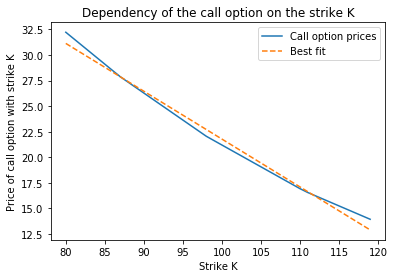

This plot show that the call price is not exactly linear with regards to the strike K
It always shows that the call price is indeed a convex function of the strike K


In [79]:
y1=[Calln(S0, T, n, r, b, sigma, k) for k in K]
plt.plot(K, y1, label="Call option prices")
plt.plot(np.unique(K), np.poly1d(np.polyfit(K, y1, 1))(np.unique(K)), '--', label="Best fit")
plt.xlabel("Strike K")
plt.ylabel("Price of call option with strike K")
plt.title("Dependency of the call option on the strike K")
plt.legend()
plt.show()
print("This plot show that the call price is not exactly linear with regards to the strike K")
print("It always shows that the call price is indeed a convex function of the strike K")

## Using the Black Scholes formula

### Question 6

In [80]:
def call(S0, T, r, sigma, K):
    d1=(np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    return S0*sps.norm.cdf(d1)-K*np.exp(-r*T)*sps.norm.cdf(d2)

### Question 7

In [84]:
def err(S0, T, n, r, b, sigma, K):
    return Calln(S0, T, n, r, b, sigma, K)/call(S0, T, r, sigma,K)-1

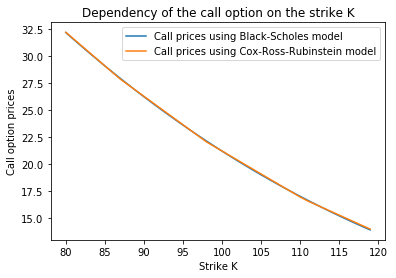

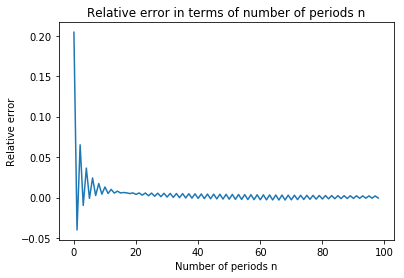

The error between the two models converges to 0


In [86]:
y2=[call(S0, T, r, sigma, k) for k in K]
plt.plot(K, y2, label="Call prices using Black-Scholes model")
plt.plot(K,y1, label="Call prices using Cox-Ross-Rubinstein model")
plt.xlabel("Strike K")
plt.ylabel("Call option prices")
plt.title("Dependency of the call option on the strike K")
plt.legend()

plt.figure()
K2=105
plt.plot([err(S0,T,n,r,b,sigma,K2) for n in range(1,100)])
plt.xlabel("Number of periods n")
plt.ylabel("Relative error")
plt.title("Relative error in terms of number of periods n")
plt.show()

print("The error between the two models converges to 0")